# O Método de Taylor de Ordem $q$

Vamos resolver o problema de valor inicial $$ \left\{ \begin{array}{l} y' = -y + x + 2, \quad [0, 0.3] \\
y(0) = 2\end{array} \right. $$ utilizando o Método de Taylor de ordem 3. Assim, vamos considerar $$y_{n+1}=y_n + h f_n \frac{h^2}{2} f'_n + \frac{h^3}{3!}f''_n.$$

In [1]:
using Plots, LinearAlgebra

In [2]:
f(x,y) = -y+x+2
df(x,y) = y - x -1
ddf(x,y) = -y + x + 1

ddf (generic function with 1 method)

In [3]:
x0 = 0
xf = 0.3
dx = 0.01
y0 = 2

2

In [4]:
ϕ(x,y) = y + dx * f(x,y)+dx^2/2 * df(x,y)+dx^3/6 * ddf(x,y)

ϕ (generic function with 1 method)

In [5]:
x = Float64[]
y = Float64[]

push!(x,x0)
push!(y,y0)

t = x0
yn = y0;

while t <= xf
    yn = ϕ(t,yn);
    push!(y,yn);
    t = t + dx;
    push!(x,t)
end

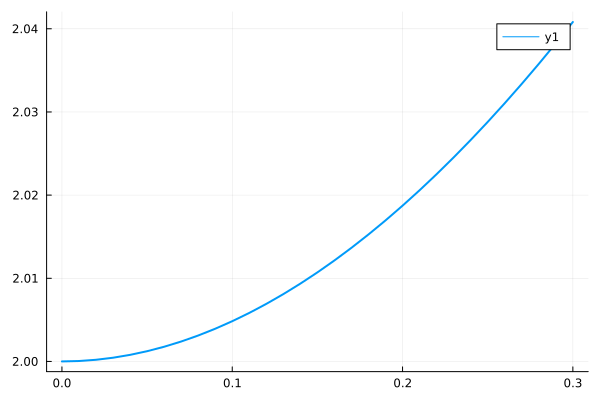

In [6]:
plot(x,y,lw=2)

In [7]:
# Solução Exata
ex(x) = exp(-x) + x + 1

ex (generic function with 1 method)

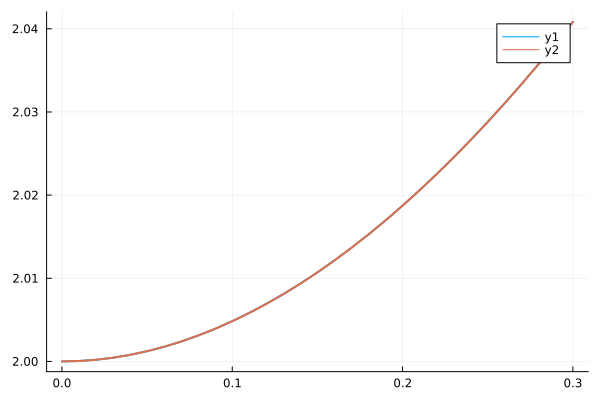

In [8]:
plot!(x,ex.(x),lw=2)

## O Sistema Presa-Predador

Vamos implementar o método de Taylor de ordem 3 para resolver o sistema presa predador $$\left\{ \begin{array}{l}  x_1' = (a-bx_2)x_1\\ x_2'=(-c+dx_1)x_2\end{array} \right.$$ Antes, notamos que o sistema acima possui duas singularidades $(0,0)$ e $(c/d,a/b)$.

Definição de algumas funções e parâmetros

In [9]:
function presapredador(x1_0,x2_0)
t_0 = 0.0;
t_f = 20.0;

#x1_0 = 1.0;
#x2_0 = 2.0;

a = 1.0;
b = 0.5;
c = 0.75;
d = 0.25;

n = 100000;

dt = (t_f - t_0) / n;

f1(x,y) = (a - b * y) * x
f2(x,y) = (-c + d* x) * y

df1(x,y) = -b*y - b*x * f1(x,y);
df2(x,y) = d*y+(-c+d*x)*f2(x,y);

ddf1(x,y) = -b*f1(x,y)-b*x*df1(x,y);
ddf2(x,y) = d + (d*x-c)*df2(x,y);

phi1(t,x,y) = x + dt * f1(x,y)+dt^2/2 * df1(x,y)+dt^3/6 * ddf1(x,y);
phi2(t,x,y) = y + dt * f2(x,y)+dt^2/2 * df2(x,y)+dt^3/6 * ddf2(x,y);

t = Float64[];
x1 = Float64[];
x2 = Float64[];

push!(t,t_0);
push!(x1,x1_0);
push!(x2,x2_0);

tmp = t_0;
while tmp < t_f
    nx1 = phi1(tmp,x1[end],x2[end]);
    nx2 = phi2(tmp,x1[end],x2[end]);
    push!(x1,nx1);
    push!(x2,nx2);
    tmp = tmp + dt;
    push!(t,tmp);
end

return(x1,x2)

end


presapredador (generic function with 1 method)

In [10]:
(x11,x12) = presapredador(1,1);
(x21,x22) = presapredador(2,2);
(x31,x32) = presapredador(2,1);

In [11]:
plot(t,x11,lw=2,label="x1")
plot!(t,x12,lw=2,label="x2")

LoadError: Cannot convert Float64 to series data for plotting

In [ ]:
plot(x11,x12,lw=2,leg=false)
plot!(x21,x22,lw=2)
plot!(x31,x32,lw=2)
scatter!([1],[1])
scatter!([2],[2])

